# 7 Days of code - Alura

![image](7dayslogo.png)

# Projeto: Analisando dados de Cotas para Exercício de Atividade Parlamentar do ano 2015 (CEAPS)

## Dia 1 - Limpeza e tratamento de dados

Importando os pacotes que irei utilizar durante a EDA (Exploratory Data Analysis).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py 
import plotly.graph_objs as go 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
py.init_notebook_mode(connected = True)
sns.set()

O primeiro passo é ler o arquivo `.csv` e transformá-lo em um `DataFrame` para que possamos tratar os dados e posteriormente usá-los para nas análises.

Fonte: [Dados Abertos - CEAPS](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps)

In [2]:
df = pd.read_csv("datasets\despesa_ceaps_2015.csv", encoding = 'iso-8859-1', sep = ';')

Vamos utilizar o método `info()` para olhar a estrutura do `DataFrame`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26057 entries, ('ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DATA', 'DETALHAMENTO') to ('2015', '12', 'ZEZÉ PERRELLA', 'Passagens aéreas, aquáticas e terrestres nacionais', '02.012.862/0001-60', 'TAM', '7NJ8UP', '20/12/2015', 'Companhia Aérea: TAM, Localizador: 7NJ8UP. Passageiros: MARCO ANTÔNIO PAIS DOS REYS (Matrícula 105147, EFETIVO), Voo: 3826 - RIO/BSB - 20/12/2015;')
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ULTIMA ATUALIZACAO  26057 non-null  object
 1   06/08/2021 02:01    26055 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


Do output acima é possível ver que a forma do `DataFrame` não é a ideal para se trabalhar, pois as colunas com as informações encontram-se como `index` do DataFrame. Utilizando o método `head()` podemos verificar o problema na estrutura do `DataFrame`.

In [4]:
df.head()

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                    DOCUMENTO DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2015 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 05.914.650/0001-66 ENERGISA                      647777    14/01/2015 NaN                                                             52,34   
                                                                                                                          000647776 18/01/2015 Despesa com pagamento de energia elétrica para ...             168,17   
                                                                         004.948.028-63     GILBERTO PISELO DO NASCIMENTO 001/15    30/01/2015 Despesa com pagamento de aluguel de imóvel para...               5000   
                                                                         05.423.963/0001-11 OI MÓVEL S.A.                 556241490 19/01/2015 Despesa com pagamento de telefonia para uso do ...             416,95   

                                                                                                                                                                                                  06/08/2021 02:01  
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                    DOCUMENTO DATA       DETALHAMENTO                                          COD_DOCUMENTO  
2015 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 05.914.650/0001-66 ENERGISA                      647777    14/01/2015 NaN                                                         2000857  
                                                                                                                          000647776 18/01/2015 Despesa com pagamento de energia elétrica para ...          2001140  
                                                                         004.948.028-63     GILBERTO PISELO DO NASCIMENTO 001/15    30/01/2015 Despesa com pagamento de aluguel de imóvel para...          2001144  
                                                                         05.423.963/0001-11 OI MÓVEL S.A.                 556241490 19/01/2015 Despesa com pagamento de telefonia para uso do ...          2001141

Para consertar esse problema, devemos utilizar o método `reset_index()`, com isso iremos resetar o `index` do `DataFrame`, de forma que todos eles se tornarão colunas na nova versão do `DataFrame`.

In [5]:
df.reset_index(inplace = True)
df.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,ULTIMA ATUALIZACAO,06/08/2021 02:01
0,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,647777,14/01/2015,NaN,"52,34",2000857
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,000647776,18/01/2015,Despesa com pagamento de energia elétrica para...,"168,17",2001140
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/15,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000,2001144
4,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,556241490,19/01/2015,Despesa com pagamento de telefonia para uso do...,"416,95",2001141


Chamando o método `head()` podemos visualizar as 5 primeiras colunas do `DataFrame` com o `index` resetado. Aqui é possível ver que as informações que estavam no `index` se tornaram colunas, mas os nomes dessas colunas não estão de acordo com as informações armazenadas (level_0, level_1 e etc), na verdade os nomes corretos para as colunas encontram-se na primeira linha do novo `DataFrame`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26057 entries, 0 to 26056
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   level_0             26057 non-null  object
 1   level_1             26057 non-null  object
 2   level_2             26057 non-null  object
 3   level_3             26057 non-null  object
 4   level_4             26057 non-null  object
 5   level_5             26057 non-null  object
 6   level_6             21851 non-null  object
 7   level_7             26057 non-null  object
 8   level_8             22004 non-null  object
 9   ULTIMA ATUALIZACAO  26057 non-null  object
 10  06/08/2021 02:01    26055 non-null  object
dtypes: object(11)
memory usage: 2.2+ MB


Na célula de código abaixo vamos resolver esse problema fazendo a renomeação das colunas, deletando a primeira linha do `DataFrame` e resetando o `index`.

In [7]:
columns_list = [column for column in df.columns]
new_columns_list = [item for item in df.iloc[0,:]]
df = df.rename(columns={item[0]: item[1] for item in zip(columns_list, new_columns_list)})
df = df.drop(index = 0, axis = 'rows')
df.reset_index(inplace = True)
del df['index']
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,647777,14/01/2015,NaN,"52,34",2000857
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,000647776,18/01/2015,Despesa com pagamento de energia elétrica para...,"168,17",2001140
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/15,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000,2001144
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,556241490,19/01/2015,Despesa com pagamento de telefonia para uso do...,"416,95",2001141
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,14654,09/01/2015,Despesa com material de consumo para uso do es...,"108,5",2001139


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26056 entries, 0 to 26055
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                26056 non-null  object
 1   MES                26056 non-null  object
 2   SENADOR            26056 non-null  object
 3   TIPO_DESPESA       26056 non-null  object
 4   CNPJ_CPF           26056 non-null  object
 5   FORNECEDOR         26056 non-null  object
 6   DOCUMENTO          21850 non-null  object
 7   DATA               26056 non-null  object
 8   DETALHAMENTO       22003 non-null  object
 9   VALOR_REEMBOLSADO  26056 non-null  object
 10  COD_DOCUMENTO      26054 non-null  object
dtypes: object(11)
memory usage: 2.2+ MB


Analisando o output do método `info()` no `DataFrame` melhorado, podemos notar que existem alguns `NaN` presentes em algumas colunas. Além disso, todas as colunas são do tipo `object`, portanto estão na forma de string ou de algum outro tipo de objeto não número do Python, contudo a coluna VALOR_REEMBOLSADO claramente deveria ser do tipo numérico `float`, já que se tratam de valores monetários.

Antes de iniciarmos a análise devemos dar uma olhada nos dados, tratar problemas e alterar o tipo de dado onde for necessário. Para dar início a essa etapa, vou analisar os dois valores `NaN` presentes na coluna COD_DOCUMENTO.

In [9]:
df['COD_DOCUMENTO'].isna().sum()

2

In [10]:
df[df['COD_DOCUMENTO'].isna()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
5922,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"SEM FATURA"";02/08/2015""","Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675,NaN
5929,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"¨¨SEM FATURA"";17/08/2015""","Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557,NaN


A célula de código acima nos fornece uma tabela com as informações das duas linhas onda há `NaN` na coluna COD_DOCUMENTO. Analisando essas duas linhas e comparando-as com as cinco linhas apresentadas como resultado da utilização do método `head()` após solucionarmos o problema do nome das colunas, já é possível identificar que não é apenas a coluna COD_DOCUMENTO que encontra-se problemática nessas duas linhas. Observe que na coluna DETALHAMENTO temos os valores das despesas em vez da descrição da despesa, já na coluna VALOR_REEMBOLSADO encontram-se os códigos dos documentos e na coluna DATA temos as informações sobre o detalhamento das despesas. Além disso, é possível notar que na coluna DOCUMENTO temos a informação SEM FATURA e uma data, que possivelmente é a data de faturamento do documento, já a data que encontra-se no conteúdo da coluna DATA deve se referir a data em que a viagem ocorreu.

Uma vez que constatamos os problemas nessas linhas, agora podemos fazer as alterações necessárias nas células de código abaixo afim de consertar os problemas presentes nessas linhas do `DataFrame`.


In [11]:
rows_list = [index for index in df[df['COD_DOCUMENTO'].isna()].index]

for row in rows_list:

    df['COD_DOCUMENTO'][row] = df['VALOR_REEMBOLSADO'][row]
    df['VALOR_REEMBOLSADO'][row] = df['DETALHAMENTO'][row]
    df['DETALHAMENTO'][row]= df['DATA'][row]
    infos = df['DOCUMENTO'][row].replace('"', "").split(";")
    df['DOCUMENTO'][row] = infos[0]
    df['DATA'][row] = infos[1]

df.iloc[rows_list, :]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
5922,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,SEM FATURA,02/08/2015,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675
5929,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,¨¨SEM FATURA,17/08/2015,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557


Agora tudo parece correto, exceto por dois caracteres estranhos na frente das palavras SEM FATURA na coluna DOCUMENTO da linha 5929. Na próxima célula de código vamos retirar esses caracteres estranhos.

In [12]:
df['DOCUMENTO'] = df['DOCUMENTO'][5929][2:]
df.iloc[rows_list, :]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
5922,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,SEM FATURA,02/08/2015,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675
5929,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,SEM FATURA,17/08/2015,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557


Agora sim, tudo está correto! Antes de irmos para o próximo passo, vamos realizar uma nova checagem na coluna COD_DOCUMENTO para ver que agora de fato não existem `NaN` nela.

In [13]:
df['COD_DOCUMENTO'].isna().sum()

0

Como o resultado da soma executada na célula de cógido acima foi igual a 0, é possível inferir que não existem mais `NaN` na coluna COD_DOCUMENTO. Se usarmos o método `info()` veremos que de fato todas as entradas nessa coluna são `non-null`. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26056 entries, 0 to 26055
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                26056 non-null  object
 1   MES                26056 non-null  object
 2   SENADOR            26056 non-null  object
 3   TIPO_DESPESA       26056 non-null  object
 4   CNPJ_CPF           26056 non-null  object
 5   FORNECEDOR         26056 non-null  object
 6   DOCUMENTO          26056 non-null  object
 7   DATA               26056 non-null  object
 8   DETALHAMENTO       22003 non-null  object
 9   VALOR_REEMBOLSADO  26056 non-null  object
 10  COD_DOCUMENTO      26056 non-null  object
dtypes: object(11)
memory usage: 2.2+ MB


Do output acima vemos que agora tudo está certo na coluna COD_DOCUMENTO, porém na coluna detalhamento temos várias entradas `NaN`. Na célula de código abaixo calculamos a quantidade de entradas `NaN` na coluna DETALHAMENTO.

In [15]:
df['DETALHAMENTO'].isna().sum()

4053

Rodando o comando na célula de código abaixo, temos como resultado uma tabela com todas as linhas em que `NaN` esteja presente na coluna DETALHAMENTO.

In [16]:
df[df['DETALHAMENTO'].isna()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,SEM FATURA,14/01/2015,NaN,"52,34",2000857
439,2015,1,ALFREDO NASCIMENTO,"Aluguel de imóveis para escritório político, c...",023.211.571-00,Gilberto Assunção de Oliveira,SEM FATURA,05/01/2015,NaN,3420,2000792
440,2015,1,ALFREDO NASCIMENTO,"Aluguel de imóveis para escritório político, c...",00.108.786/0001-65,Net,SEM FATURA,05/01/2015,NaN,"307,74",2000796
879,2015,6,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,SEM FATURA,24/06/2015,NaN,"506,61",2011576
891,2015,8,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",16.978.175/0001-08,Ádria Viagens e Turismo,SEM FATURA,01/09/2015,NaN,385,2017062
...,...,...,...,...,...,...,...,...,...,...,...
26046,2015,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",00.911.117/0001-27,Sulamita Naves de Aguiar,SEM FATURA,13/12/2015,NaN,"181,11",2028003
26047,2015,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",07.642.352/0001-90,União Frota Car Aluguel de Veiculos Ltda,SEM FATURA,29/01/2016,NaN,4800,2032655
26048,2015,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",07.642.352/0001-90,União Frota Car Aluguel de Veiculos Ltda,SEM FATURA,29/01/2016,NaN,5000,2032654
26049,2015,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",15.380.100/0001-68,Vila gastronomia ltda,SEM FATURA,16/12/2015,NaN,"373,67",2028007


Como a princípio não temos mecanismos para saber a razão de o campo estar vazio e como não dispomos da informação que deveria preencher o campo. Sendo assim, uma alternativa viável é trocar os `NaN` por "Dado ausente ou não informado". Na célula de código abaixo faremos essa alteração.

In [17]:
df['DETALHAMENTO'].fillna(value = "Dado ausente ou não informado", inplace = True)

In [18]:
df['DATA'].isna().sum()

0

In [19]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,SEM FATURA,14/01/2015,Dado ausente ou não informado,"52,34",2000857
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,SEM FATURA,18/01/2015,Despesa com pagamento de energia elétrica para...,"168,17",2001140
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,SEM FATURA,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000,2001144
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,SEM FATURA,19/01/2015,Despesa com pagamento de telefonia para uso do...,"416,95",2001141
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,SEM FATURA,09/01/2015,Despesa com material de consumo para uso do es...,"108,5",2001139


Agora que os campos incosistentes e ausentes foram tratados, é possível começar a pensar na troca do tipo de dado das colunas em que essa ação é necessária, como no caso da coluna VALOR_REEMBOLSADO, uma vez que os dados presentes nela correspondem a valores monetários, sendo assim representam dados numéricos que podem ter até duas casas decimais. Para realizar essa mudança de tipo de dado, se faz necessário executar os comandos presentes na célula de código abaixo.

In [20]:
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].str.replace(",", ".")
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].astype(float)
df.VALOR_REEMBOLSADO.dtype

dtype('float64')

Convertendo o mês e o ano para `int`.

In [21]:
df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26056 entries, 0 to 26055
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                26056 non-null  int32  
 1   MES                26056 non-null  int32  
 2   SENADOR            26056 non-null  object 
 3   TIPO_DESPESA       26056 non-null  object 
 4   CNPJ_CPF           26056 non-null  object 
 5   FORNECEDOR         26056 non-null  object 
 6   DOCUMENTO          26056 non-null  object 
 7   DATA               26056 non-null  object 
 8   DETALHAMENTO       26056 non-null  object 
 9   VALOR_REEMBOLSADO  26056 non-null  float64
 10  COD_DOCUMENTO      26056 non-null  object 
dtypes: float64(1), int32(2), object(8)
memory usage: 2.0+ MB


In [23]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,SEM FATURA,14/01/2015,Dado ausente ou não informado,52.34,2000857
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,SEM FATURA,18/01/2015,Despesa com pagamento de energia elétrica para...,168.17,2001140
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,SEM FATURA,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000.00,2001144
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,SEM FATURA,19/01/2015,Despesa com pagamento de telefonia para uso do...,416.95,2001141
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,SEM FATURA,09/01/2015,Despesa com material de consumo para uso do es...,108.50,2001139


Até aqui tudo parece certo com nosso `DataFrame`, mas se executarmos o comando `df['DATA'] = pd.to_datetime(df['DATA'])` para converter a coluna DATA para `datetime`, veremos que uma mensagem de erro aparecerá, isso porque existem datas incosistentes na coluna. Após algumas tentativas, é possível encontrar datas com o campo do ano incorreto, como por exemplo: 18/03/2105, 06/10/2195, 26/08/0201, 24/02/5015 e outras. Existem também algumas datas com o ano igual a 2014, 2016, 2017 e 2020, estas é preciso realizar uma análise mais profunda para investigar se não estão em transição de ano ou se foram lançadas posteriormente. Este segundo caso não vamos tratar e vamos considerar dado normal datas com ano entre 2014-2022, mas o primeiro parece claro que trata-se de erro de digitação, sendo assim devemos corrigí-los.

Para identificar as linhas onde há problema na coluna DATA, vamos realizar um `for` loop para percorrer cada linha, pegar o campo DATA e dar um `split("/")` para separar dia, mês e ano. Em seguida, vamos fazer outro `for` loop onde vamos analisar o ano obtido de cada linha do `for` anterior, caso eles sejam dados discrepantes serão adicionados a uma lista, nela encontraremos o `index` e a data "splitada".   

In [24]:
dates_list = []

for _, row in df.iterrows():
    
    dates_list.append(row['DATA'].split("/"))
    
wrong_input_dates = []

for index, date in enumerate(dates_list):
    
    if int(date[2]) > 2022:
        
        wrong_input_dates.append([index, date])
        
    if int(date[2]) < 2000:
        
        wrong_input_dates.append([index, date])

Imprimindo a lista com os dados discrepantes.

In [25]:
wrong_input_dates

[[2791, ['18', '03', '2105']],
 [2981, ['25', '08', '2105']],
 [10358, ['06', '10', '2915']],
 [11826, ['26', '08', '0201']],
 [12179, ['24', '02', '5015']],
 [18561, ['22', '04', '0215']],
 [18565, ['23', '04', '0215']],
 [22642, ['07', '05', '2041']],
 [22662, ['02', '06', '2041']],
 [22966, ['08', '05', '5201']]]

No `for` loop abaixo ajustamos o ano e geramos a data correta.

In [26]:
corrected_dates = []

for wrong_date in wrong_input_dates:
    
    date_string = f"{wrong_date[1][0]}/{wrong_date[1][1]}/2015"
    corrected_dates.append([wrong_date[0], date_string])

Imprimindo as datas corrigidas.

In [27]:
corrected_dates

[[2791, '18/03/2015'],
 [2981, '25/08/2015'],
 [10358, '06/10/2015'],
 [11826, '26/08/2015'],
 [12179, '24/02/2015'],
 [18561, '22/04/2015'],
 [18565, '23/04/2015'],
 [22642, '07/05/2015'],
 [22662, '02/06/2015'],
 [22966, '08/05/2015']]

Consertando os campos de data com erro.

In [28]:
for date in corrected_dates:
    
    df['DATA'][date[0]] = date[1]

Tentando converter a coluna DATA para `datetime`.

In [29]:
df['DATA'] = pd.to_datetime(df['DATA'])

Como não obtivemos um erro como resultado da execução da célula acima, parece que agora tudo está correto e estamos prontos para a etapa de análise dos dados.

In [30]:
df['DATA']

0       2015-01-14
1       2015-01-18
2       2015-01-30
3       2015-01-19
4       2015-09-01
           ...    
26051   2015-12-18
26052   2015-11-12
26053   2015-12-19
26054   2015-12-24
26055   2015-12-20
Name: DATA, Length: 26056, dtype: datetime64[ns]

## Dia 2 - Análise exploratória de dados, visualização e storytelling

A CEAP (Cota para Exercício da Atividade Parlamentar) é um valor extra, além de selário e benefícios, que os deputados federais e senadores possuem para gastar com despesas como comida, passagens de avião e combustível. Cada parlamentar tem direito a um gasto de até 44.000,00 reais por mês, ou seja, 528.000,00 reais no ano, considerando todo o parlamento federal brasileiro (513 deputados + 81 senadores), temos que o total para todos os membros do legislativo brasileiro pode chegar até 26.136.000,00 reais por mês e 313.632.000,00 reais por ano. Para que o parlamentar seja reembolsado, ele precisa usar seu dinheiro e depois enviar as notas fiscais dos gastos para a Câmara dos Deputados ou Senado Federal para receber o reembolso.

In [31]:
gasto_ativ_parlamentar_p_mes = 44000
gasto_ativ_parlamentar_anual = gasto_ativ_parlamentar_p_mes * 12

Quantos tipos de despesas são passíveis de reembolso?

In [32]:
len(df['TIPO_DESPESA'].unique())

7

Quais são esses tipos?

In [33]:
df['TIPO_DESPESA'].unique()

array(['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Divulgação da atividade parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Serviços de Segurança Privada'], dtype=object)

Tipo de despesas passíveis de reembolso:

1 - Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.

2 - Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.

3 - Divulgação da atividade parlamentar.

4 - Locomoção, hospedagem, alimentação, combustíveis e lubrificantes.

5 - Passagens aéreas, aquáticas e terrestres nacionais.

6 - Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar

7 - Serviços de Segurança Privada

In [34]:
tipo_gastos_dict = {f"{index+1}": descricao for index, descricao in enumerate(df['TIPO_DESPESA'].unique())}

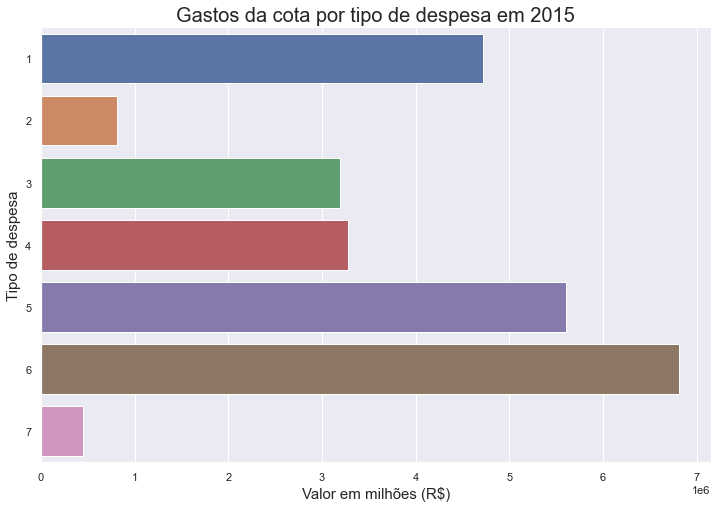

In [36]:
fig, ax = plt.subplots()

ax = sns.barplot(y = [*tipo_gastos_dict.keys()], x = df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum())
ax.set_xlabel("Valor em milhões (R$)", fontsize = 15)
ax.set_ylabel("Tipo de despesa", fontsize = 15)
ax.set_title("Gastos da cota por tipo de despesa em 2015", fontsize = 20)
fig.set_size_inches((12, 8))
fig.savefig("figures\gastos_da_cota_por_tipo_de_despesa_em_2015.png")

In [37]:
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec']

bar1 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[:12], name = "Tipo 1")
bar2 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[12:24], name = "Tipo 2")
bar3 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[24:36], name = "Tipo 3")
bar4 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[36:48], name = "Tipo 4")
bar5 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[48:60], name = "Tipo 5")
bar6 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[60:72], name = "Tipo 6")
bar7 = go.Bar(x = months, y = df.groupby(['MES', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum()[72:], name = "Tipo 7")
data = [bar1, bar2, bar3, bar4, bar5, bar6, bar7]
layout = go.Layout(title = 'Evolução do valor total de reembolsos pagos por mês aos senadores por tipo de gasto no ano de 2015', yaxis = {'title': 'Valor total dos reembolsos (R$)'}, xaxis = {'title': 'Mês'}, barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [38]:
bar = go.Bar(x = months, y = df.groupby('MES')['VALOR_REEMBOLSADO'].count())
data = [bar]
layout = go.Layout(title = 'Evolução do número de reembolsos solicitados por mês pelos senadores em 2015', yaxis = {'title': 'Contagem total de reembolsos'}, xaxis = {'title': 'Mês'})
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Quantos reembolsos foram solicitados em 2015?

In [39]:
df['VALOR_REEMBOLSADO'].count()

26056

Qual foi o valor da cota gasto pelos senadores?

In [40]:
df['VALOR_REEMBOLSADO'].sum()

24860248.59

In [41]:
total_anual = (gasto_ativ_parlamentar_anual * 81 - df['VALOR_REEMBOLSADO'].sum())/(gasto_ativ_parlamentar_anual * 81)
np.round(total_anual, 3)

0.419

De acordo com os dados do CEAPS, em 2015 foram realizados 26056 reembolsos aos senadores da república, totalizando uma quantia de 24.860.248,59 de reais pagos, cerca de 41,9% de um total de 42.768.000,00 de reais permitido por ano para os 81 senadores.

In [56]:
df['VALOR_REEMBOLSADO'].mean()

954.1084045901137

In [57]:
df['VALOR_REEMBOLSADO'].min()

-1500.0

In [63]:
for index in df[df['VALOR_REEMBOLSADO'] < 0].index:
    
    df['VALOR_REEMBOLSADO'][index] = -1*df['VALOR_REEMBOLSADO'][index]

O valor médio dos reembolsos: R$ 954,22

In [92]:
np.round(df['VALOR_REEMBOLSADO'].mean(), 2)

954.22

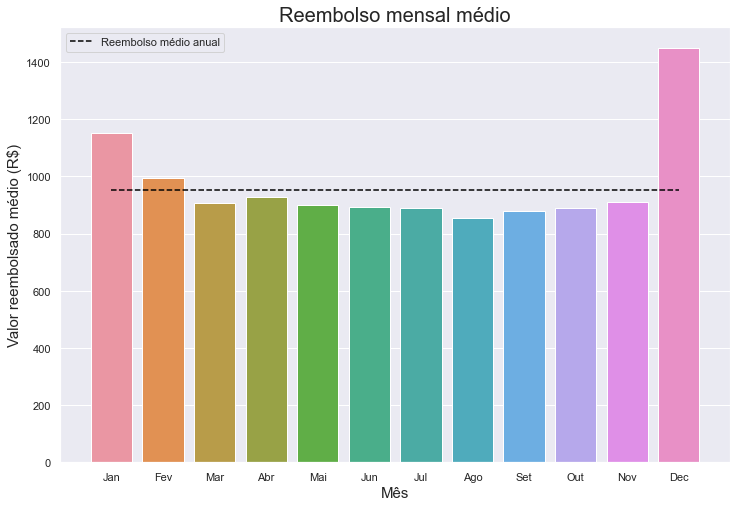

In [111]:
fig, ax = plt.subplots()

ax = sns.barplot(x = months, y = df.groupby('MES')['VALOR_REEMBOLSADO'].mean())
ax.hlines(np.round(df['VALOR_REEMBOLSADO'].mean(), 2), xmin = 0, xmax = 11, linestyle = "dashed", color = "black", label = "Reembolso médio anual")
ax.set_xlabel("Mês", fontsize = 15)
ax.set_ylabel("Valor reembolsado médio (R$)", fontsize = 15)
ax.set_title("Reembolso mensal médio", fontsize = 20)
ax.legend()
fig.set_size_inches((12,8))
fig.savefig("figures\grafico_reembolso_mensal_medio.png")

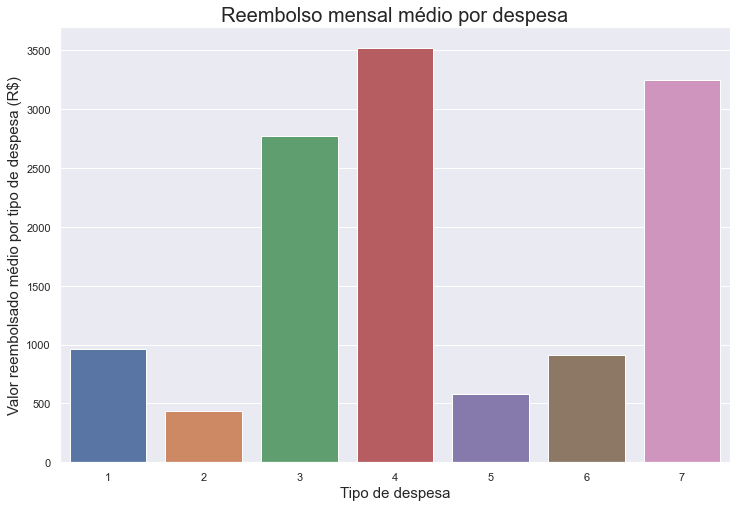

In [108]:
fig, ax = plt.subplots()

ax = sns.barplot(x = [*range(1,8)], y = df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].mean())
ax.set_xlabel("Tipo de despesa", fontsize = 15)
ax.set_ylabel("Valor reembolsado médio por tipo de despesa (R$)", fontsize = 15)
ax.set_title("Reembolso mensal médio por despesa", fontsize = 20)
fig.set_size_inches((12,8))

O valor mínimo reembolsado: R$ 0,01

In [67]:
df['VALOR_REEMBOLSADO'].min()

0.01

Valor curioso, vamos dar uma olhada nas linhas em que ele aparece...

In [72]:
df[df['VALOR_REEMBOLSADO'] == 0.01]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
4346,2015,6,DAVI ALCOLUMBRE,"Passagens aéreas, aquáticas e terrestres nacio...",14.294.443/0001-47,A.Camacho Torres - ME,SEM FATURA,2015-06-19,"Companhia Aérea: TAM, Localizador: 7RBYY5. Pas...",0.01,2013240
7305,2015,10,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,SEM FATURA,2015-10-27,"Companhia Aérea: GOL, Localizador: KDNPUS. Pas...",0.01,2021743
7340,2015,11,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,SEM FATURA,2015-05-11,"Companhia Aérea: GOL, Localizador: AG8QJW. Pas...",0.01,2023323
7386,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,OCEAIN AIR,SEM FATURA,2015-12-18,"Companhia Aérea: AVIANCA, Localizador: 7QRZVT....",0.01,2027132
7387,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,OCEAIN AIR,SEM FATURA,2015-12-18,"Companhia Aérea: AVIANCA, Localizador: 7QNCDJ....",0.01,2027131
7388,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,OCEAIN AIR,SEM FATURA,2016-01-21,"Companhia Aérea: AVIANCA, Localizador: 7LTXVI....",0.01,2028289
7391,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,SEM FATURA,2015-12-18,"Companhia Aérea: TAM, Localizador: 7QXMZN. Pas...",0.01,2028269
12031,2015,11,JOSÉ MARANHÃO,"Passagens aéreas, aquáticas e terrestres nacio...",11.902.871/0001-17,APOIOTUR VIAGENS E TURISMO LTDA,SEM FATURA,2015-11-16,"Companhia Aérea: AVIANCA, Localizador: 56N55D....",0.01,2026056
22054,2015,7,ROSE DE FREITAS,"Locomoção, hospedagem, alimentação, combustíve...",08.471.100/0001-08,Posto Mclaren LTDA,SEM FATURA,2015-07-20,Dado ausente ou não informado,0.01,2015046


O maior valor de reembolso: R$ 216.780,00

In [58]:
df['VALOR_REEMBOLSADO'].max()

216780.0

Vamos dar uma olhada na linha do `DataFrame` em que ele aparece...

In [93]:
df[df['VALOR_REEMBOLSADO'] == df['VALOR_REEMBOLSADO'].max()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
4432,2015,12,DAVI ALCOLUMBRE,Divulgação da atividade parlamentar,38.006.631/0001-90,Gráfica e Editora Paranaíba Ltda - ME,SEM FATURA,2016-03-29,Dado ausente ou não informado,216780.0,2033251


O valor é referente a gastos em divulgação da atividade parlamentar e foi realizado em uma gráfica e editora.

Qual foi o valor de reembolso com a maior frequência no `DataFrame`? Ou seja, a moda.

Resposta: R$ 50,00

In [59]:
df['VALOR_REEMBOLSADO'].mode()

0    50.0
Name: VALOR_REEMBOLSADO, dtype: float64

Vamos dar uma olhada nas linhas em que esse valor aparece...

In [95]:
df[df['VALOR_REEMBOLSADO'] == df['VALOR_REEMBOLSADO'].mode()[0]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
198,2015,2,AÉCIO NEVES,"Contratação de consultorias, assessorias, pesq...",02.104.236/0103-28,DIRECAO ESTACIONAMENTOS LTDA,SEM FATURA,2015-05-02,Maria Heloísa Cardoso Neves - matr. 239190 - A...,50.0,2000816
199,2015,2,AÉCIO NEVES,"Contratação de consultorias, assessorias, pesq...",02.104.236/0103-28,DIRECAO ESTACIONAMENTOS LTDA,SEM FATURA,2015-02-27,Maria Heloísa Cardoso Neves - matr. 239190 - A...,50.0,2002892
232,2015,4,AÉCIO NEVES,"Contratação de consultorias, assessorias, pesq...",02.104.236/0103-28,DIRECAO ESTACIONAMENTOS LTDA,SEM FATURA,2015-04-16,Maria Heloísa Cardoso Neves - matr. 239190 - A...,50.0,2006651
258,2015,5,AÉCIO NEVES,"Contratação de consultorias, assessorias, pesq...",02.104.236/0103-28,DIRECAO ESTACIONAMENTOS LTDA,SEM FATURA,2015-05-22,Maria Heloísa Cardoso Neves - matr. 239190 - A...,50.0,2009178
280,2015,6,AÉCIO NEVES,"Contratação de consultorias, assessorias, pesq...",02.104.236/0103-28,DIRECAO ESTACIONAMENTOS LTDA,SEM FATURA,2015-06-18,Maria Heloísa Cardoso Neves - matr. 239190 - A...,50.0,2011635
...,...,...,...,...,...,...,...,...,...,...,...
25713,2015,10,WILDER MORAIS,"Locomoção, hospedagem, alimentação, combustíve...",00.097.626/0004-00,Brasal Combustiveis Ltda,SEM FATURA,2015-01-10,Despesa com aquisição de combustível para uso ...,50.0,2021444
25788,2015,12,WILDER MORAIS,"Contratação de consultorias, assessorias, pesq...",17.296.622/0001-01,Gilvan da Silva Santos,SEM FATURA,2015-01-12,Manutenção de uma fechadura de porta de vidro ...,50.0,2026885
25792,2015,12,WILDER MORAIS,Divulgação da atividade parlamentar,33.290.479/0001-05,Fotogravura Bandeirante Ltda.,SEM FATURA,2015-04-12,Aquisição de material de consumo para uso no e...,50.0,2026879
25893,2015,6,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",15.335.622/0001-48,Posto o Milhão Eireli,SEM FATURA,2015-06-13,Dado ausente ou não informado,50.0,2011673


Olhando a distribuição dos valores reembolsados através de histogramas

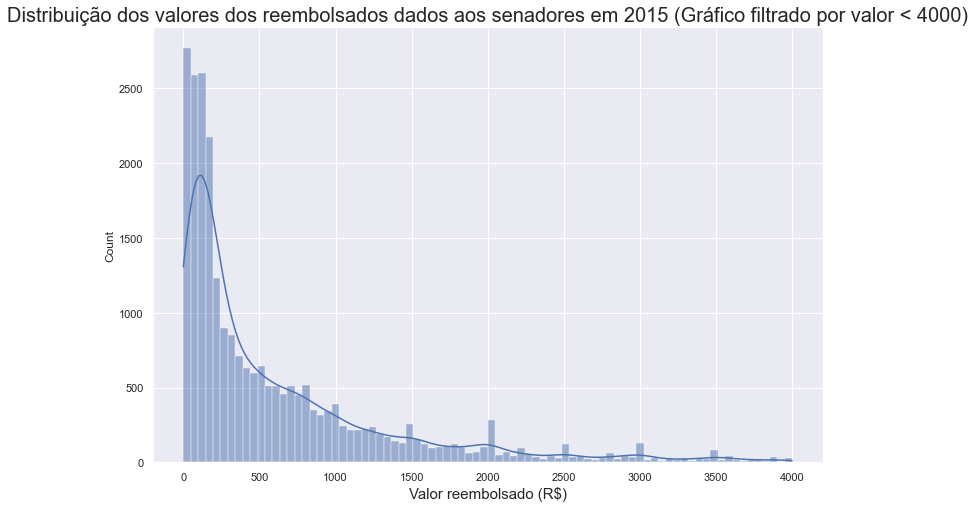

In [112]:
fig, ax = plt.subplots()

ax = sns.histplot(df[df['VALOR_REEMBOLSADO'] < 4000]['VALOR_REEMBOLSADO'], kde = True)
ax.set_xlabel("Valor reembolsado (R$)", fontsize = 15)
ax.set_ylabel("Count")
ax.set_title("Distribuição dos valores dos reembolsados dados aos senadores em 2015 (Gráfico filtrado por valor < 4000)", fontsize = 20)
fig.set_size_inches((12, 8))
fig.savefig("figures\distribuicao_reembolsos_part1.png")

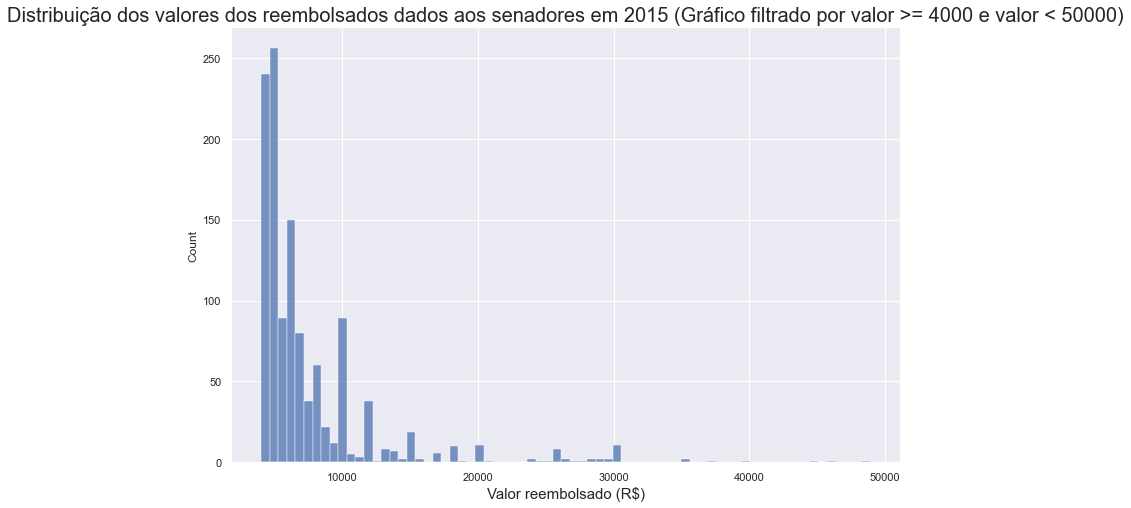

In [113]:
fig, ax = plt.subplots()

ax = sns.histplot(df[(df['VALOR_REEMBOLSADO'] >= 4000) & (df['VALOR_REEMBOLSADO'] < 50000)]['VALOR_REEMBOLSADO'])
ax.set_xlabel("Valor reembolsado (R$)", fontsize = 15)
ax.set_ylabel("Count")
ax.set_title("Distribuição dos valores dos reembolsados dados aos senadores em 2015 (Gráfico filtrado por valor >= 4000 e valor < 50000)", fontsize = 20)
fig.set_size_inches((12, 8))
fig.savefig("figures\distribuicao_reembolsos_part2.png")

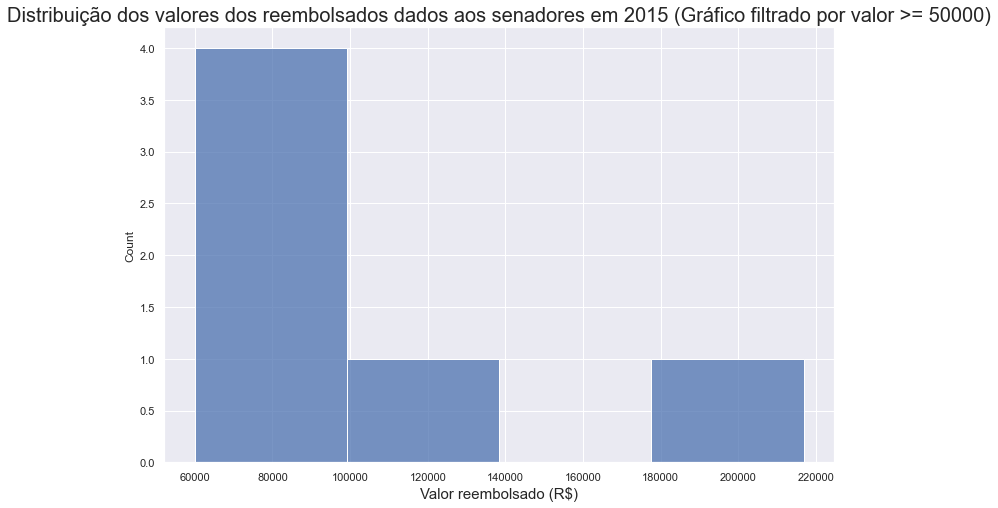

In [114]:
fig, ax = plt.subplots()

ax = sns.histplot(df[df['VALOR_REEMBOLSADO'] >= 50000]['VALOR_REEMBOLSADO'])
ax.set_xlabel("Valor reembolsado (R$)", fontsize = 15)
ax.set_ylabel("Count")
ax.set_title("Distribuição dos valores dos reembolsados dados aos senadores em 2015 (Gráfico filtrado por valor >= 50000)", fontsize = 20)
fig.set_size_inches((12, 8))
fig.savefig("figures\distribuicao_reembolsos_part3.png")

Qual é o número de PJs e PFs que forneceram algum tipo de serviço para os senadores?

In [41]:
len(df['CNPJ_CPF'].unique())

3853

Resposta: 3853

Os 10 maiores fornecedores

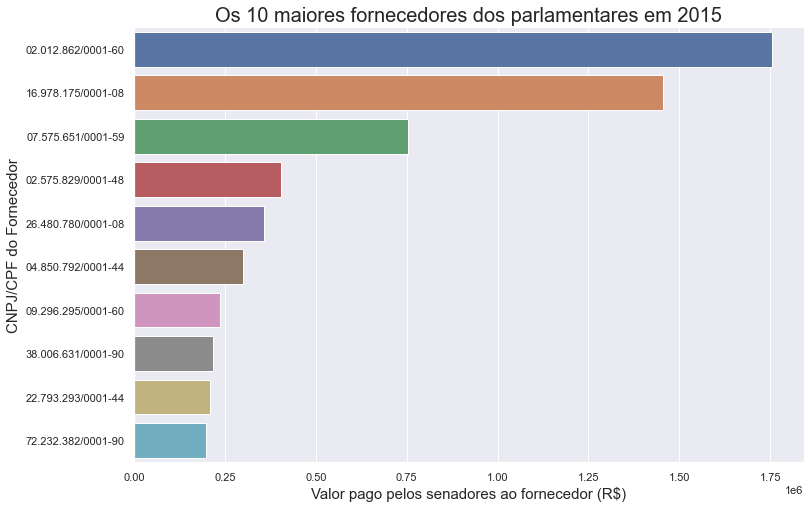

In [59]:
fig, ax = plt.subplots()

ax = sns.barplot(y = df.groupby('CNPJ_CPF')['VALOR_REEMBOLSADO'].sum().nlargest(10).index, x = df.groupby('CNPJ_CPF')['VALOR_REEMBOLSADO'].sum().nlargest(10))
ax.set_xlabel("Valor pago pelos senadores ao fornecedor (R$)", fontsize = 15)
ax.set_ylabel("CNPJ/CPF do Fornecedor", fontsize = 15)
ax.set_title("Os 10 maiores fornecedores dos parlamentares em 2015", fontsize = 20)
fig.set_size_inches((12, 8))
fig.savefig("figures\os_10_maiores_fornecedores_dos_parlamentares_em_2015.png")

In [44]:
len(df['FORNECEDOR'].unique())

4329

Note que o número de CNPJs e CPFs difere do número de fornecedores, o que nos indica que devemos ter um CNPJ ou um CPF ligados a mais de um fornecedor (por exemplo: variações do nome de uma empresa (GOL, GOL linhas aéreas e outras)). Devemos arrumar uma maneira de unificar os nomes dos fornecedores com o auxílio dos CNPJs e dos CPFs. 

Qual o número de senadores que solicitaram reembolsos?

In [60]:
len(df['SENADOR'].unique())

101

De acordo com a base de dados, 101 senadores receberam reembolso em 2015, 20 a mais do que o número de senadores, 81, que podem estar ativos. Isso talvez possa ser explicado pela entrada de suplentes ou pela contabilização de pedidos realizados ao final de 2014 que só foram contabilizados em 2015 para senadores que deixaram de ocupar o cargo, já que em 2014 foi ano de eleição e para alguns seria o fim do mandato.

Os 10 senadores que mais pediram reembolso no ano de 2015

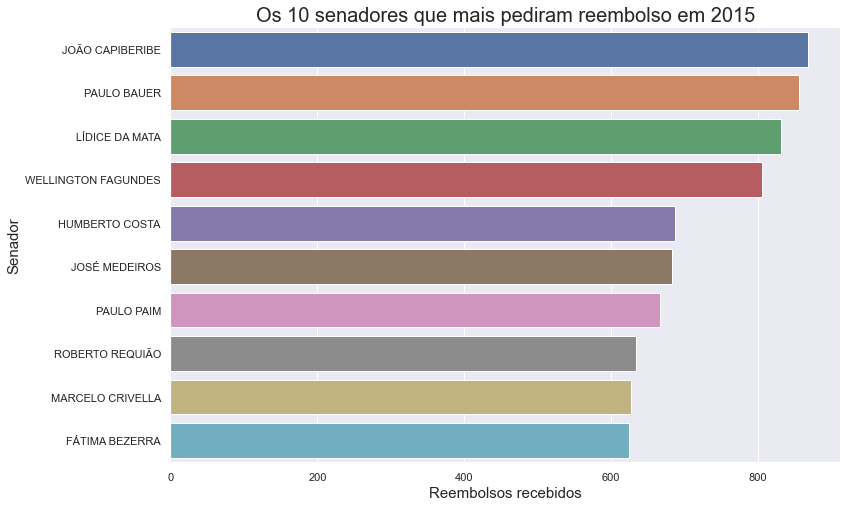

In [46]:
fig, ax = plt.subplots()

ax = sns.barplot(y = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].count().nlargest(10).index, x = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].count().nlargest(10))
ax.set_xlabel("Reembolsos recebidos", fontsize = 15)
ax.set_ylabel("Senador", fontsize = 15)
ax.set_title("Os 10 senadores que mais pediram reembolso em 2015", fontsize = 20)
fig.set_size_inches((12,8))
fig.savefig("figures\os_10_senadores_que_mais_pediram_reembolso_em_2015.png")

Os 10 senadores que mais gastaram da cota em 2015

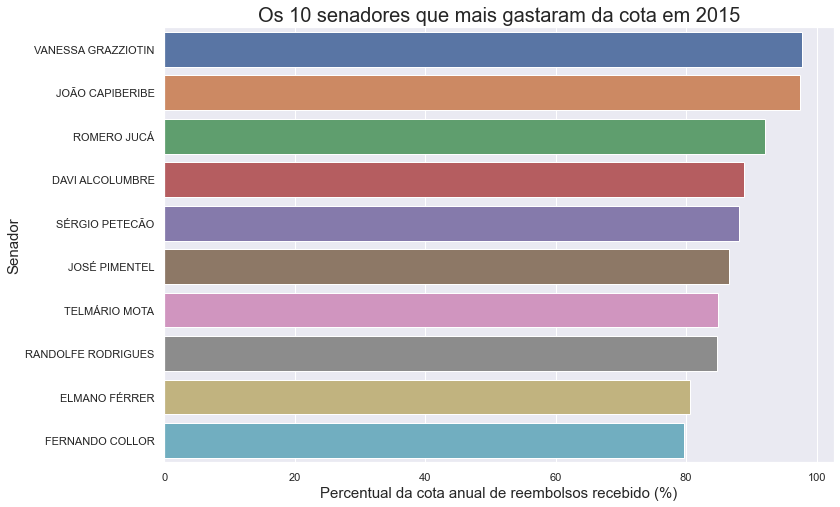

In [47]:
fig, ax = plt.subplots()

ax = sns.barplot(y = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(10).index, x = 100*(df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(10)/gasto_ativ_parlamentar_anual))
ax.set_xlabel("Percentual da cota anual de reembolsos recebido (%)", fontsize = 15)
ax.set_ylabel("Senador", fontsize = 15)
ax.set_title("Os 10 senadores que mais gastaram da cota em 2015", fontsize = 20)
fig.set_size_inches((12,8))
fig.savefig("figures\os_10_senadores_que_mais_gastaram_da_cota_em_2015.png")

Quantos senadores gastaram 90% ou mais da verba dispónível por ano?

In [48]:
(df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum() >= 0.9*gasto_ativ_parlamentar_anual).sum()

3

Resposta: 3

Quem são esses três?

In [49]:
for nome in df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(3).index:
    
    print(nome)

VANESSA GRAZZIOTIN
JOÃO CAPIBERIBE
ROMERO JUCÁ


Os 10 senadores que menos pediram reembolso em 2015

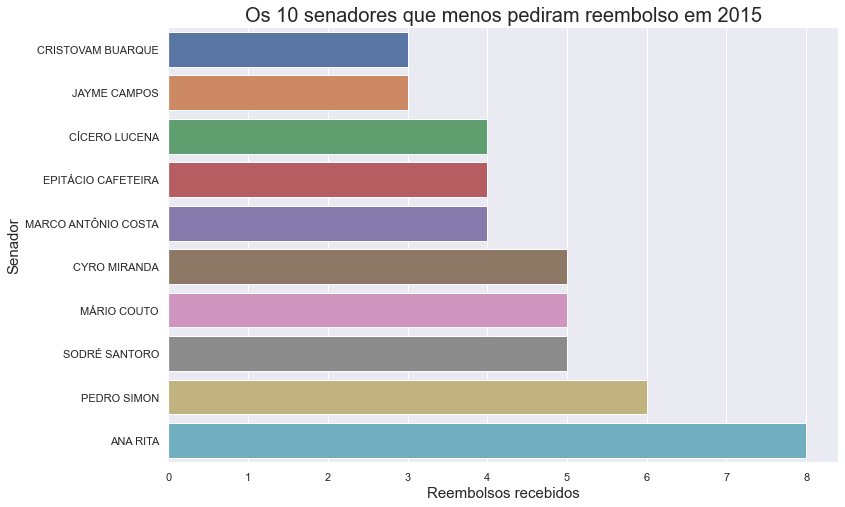

In [50]:
fig, ax = plt.subplots()

ax = sns.barplot(y = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].count().nsmallest(10).index, x = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].count().nsmallest(10))
ax.set_xlabel("Reembolsos recebidos", fontsize = 15)
ax.set_ylabel("Senador", fontsize = 15)
ax.set_title("Os 10 senadores que menos pediram reembolso em 2015", fontsize = 20)
fig.set_size_inches((12,8))
fig.savefig("figures\os_10_senadores_que_menos_pediram_reembolso_em_2015.png")

Os 10 senadores que menos gastaram da cota em 2015

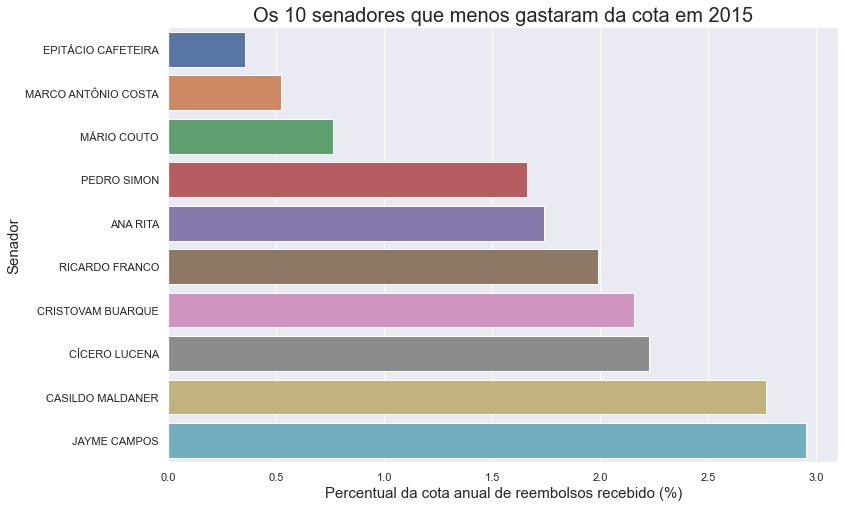

In [51]:
fig, ax = plt.subplots()

ax = sns.barplot(y = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nsmallest(10).index, x = 100*(df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nsmallest(10))/gasto_ativ_parlamentar_anual)
ax.set_xlabel("Percentual da cota anual de reembolsos recebido (%)", fontsize = 15)
ax.set_ylabel("Senador", fontsize = 15)
ax.set_title("Os 10 senadores que menos gastaram da cota em 2015", fontsize = 20)
fig.set_size_inches((12,8))
fig.savefig("figures\os_10_senadores_que_menos_gastaram_da_cota_em_2015.png")

Tiveram senadores que gastaram menos ou até 1% da cota anual?

In [52]:
(df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum() <= 0.01*gasto_ativ_parlamentar_anual).sum()

3

Resposta: Sim

Quem são esses?

In [53]:
for nome in df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nsmallest(3).index:
    
    print(nome)

EPITÁCIO CAFETEIRA
MARCO ANTÔNIO COSTA
MÁRIO COUTO


Os 10 maiores gastos por tipo de despesa e o senador que realizou tal gasto.

In [54]:
df.groupby(['SENADOR', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].sum().nlargest(10)

SENADOR            TIPO_DESPESA                                                                                                                          
FERNANDO COLLOR    Serviços de Segurança Privada                                                                                                             300674.40
OMAR AZIZ          Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar    298000.00
CIRO NOGUEIRA      Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                          265212.12
LINDBERGH FARIAS   Passagens aéreas, aquáticas e terrestres nacionais                                                                                        245415.25
VICENTINHO ALVES   Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                          242899.57
ÂNGELA PORT

## Dia 3 - Forecasting